In [1]:
import numpy as np
import torch
import torchaudio
from torchaudio.transforms import MelSpectrogram
import matplotlib.pyplot as plt
import librosa

In [2]:
wav, _ = torchaudio.load('../data/wav24k/BASIC5000_0001.wav')

In [3]:
import config as cfg
from audio import SpectrogramTransform

In [4]:
spec_tfm = SpectrogramTransform(**cfg.audio)

In [5]:
mel = spec_tfm.to_mel(wav).squeeze()

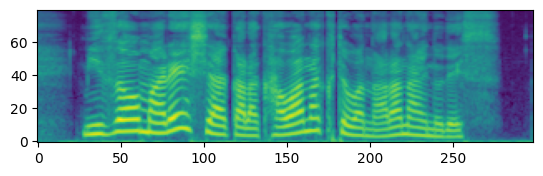

In [6]:
plt.imshow(mel, origin='lower')

In [7]:
mel.min(), mel.max()

(tensor(-11.5129), tensor(0.5202))

In [15]:
config = dict(
    sample_rate=24000,
    n_fft=1024,
    win_length=1024,
    hop_length=240,
    power=1,
    f_min=0.0,
    f_max=24000//2,
    n_mels=80,
    mel_scale='slaney',
    norm='slaney',
    center=False
)
to_mel = MelSpectrogram(**config)

In [16]:
mel = to_mel(wav).squeeze()
mel = torch.log(torch.clamp_min(mel, min=1e-5))

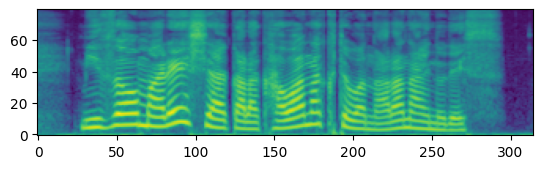

In [17]:
plt.imshow(mel, origin='lower')

In [18]:
mel.min(), mel.max()

(tensor(-11.5129), tensor(0.4834))